<a href="https://colab.research.google.com/github/yeesem/Deep_Learning/blob/main/Logistics_Regression_Cat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
w =  np.array([[1.],
              [2]])
X = np.array([[1., -2., -1.],
              [3., 0.5, -3.2]])
print(X)
print(w.T)
print(np.dot(w.T,X))

[[1.]
 [3.]]
[[1. 2.]]
[[7.]]


In [ ]:
import numpy as np

# Create an array with a single-dimensional entry
arr = np.array([[[1, 2, 3]]])

print("Original array:")
print(arr)
print("Shape of the original array:", arr.shape)

# Use np.squeeze() to remove the single-dimensional entry
arr_squeezed = np.squeeze(arr)

print("\nArray after squeezing:")
print(arr_squeezed)
print("Shape of the squeezed array:", arr_squeezed.shape)

Original array:
[[[1 2 3]]]
Shape of the original array: (1, 1, 3)

Array after squeezing:
[1 2 3]
Shape of the squeezed array: (3,)


In [ ]:
arr = np.array([[[1], [2], [3]]])
arr_squeezed_axis1 = np.squeeze(arr)

print("\nArray after squeezing along axis 1:")
print(arr_squeezed_axis1)
print("Shape of the squeezed array along axis 1:", arr_squeezed_axis1.shape)



Array after squeezing along axis 1:
[1 2 3]
Shape of the squeezed array along axis 1: (3,)


# **Logistics Regression**

In [ ]:
def load_dataset():
    with h5py.File('train_catvnoncat.h5', "r") as train_dataset:
        train_set_x_orig = np.array(train_dataset["train_set_x"][:])
        train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    with h5py.File('test_catvnoncat.h5', "r") as test_dataset:
        test_set_x_orig = np.array(test_dataset["test_set_x"][:])
        test_set_y_orig = np.array(test_dataset["test_set_y"][:])
        classes = np.array(test_dataset["list_classes"][:])

    #Reshape the Y_Train and Y_Test from 1D Array to 2D array
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import scipy
import h5py
from PIL import Image
from scipy import ndimage

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [ ]:
classes

array([b'non-cat', b'cat'], dtype='|S7')

In [ ]:
len(classes)

2

In [ ]:
#Decode the binary file
classes[np.squeeze(test_set_y[:, 25])].decode("utf-8")

'cat'

y = [1], it's a 'cat' picture.


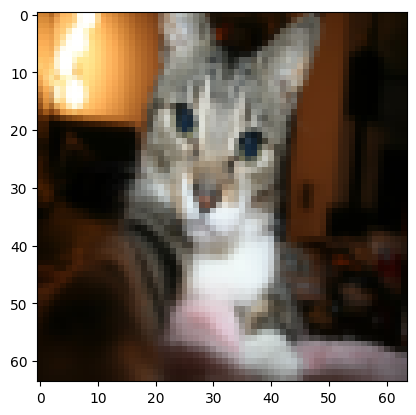

In [ ]:
index = 25
plt.imshow(test_set_x_orig[index])
print ("y = " + str(test_set_y[:,index]) + ", it's a '" + classes[np.squeeze(test_set_y[:, index])].decode("utf-8") +  "' picture.")

In [ ]:
#Number of training set
m_train = train_set_x_orig.shape[0]
#Number of testing set
m_test = test_set_x_orig.shape[0]
#number of pixel
num_px = train_set_x_orig.shape[1]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [ ]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [ ]:
# standardize our dataset.
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [ ]:
def sigmoid(z):

    s = 1 / (1 + np.exp(-z))

    return s

In [ ]:
def initialize_with_zeros(dim):

    w = np.zeros((dim,1))
    b = 0.0

    return w, b

In [ ]:
dim = 2
w, b = initialize_with_zeros(dim)

print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0.0


In [ ]:
def propagate(w, b, X, Y):

    m = X.shape[1]

    A = sigmoid(np.dot(w.T,X) + b)
    cost = (-1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    dw = (1/m) * np.dot(X,(A - Y).T)
    db = (1/m) * np.sum(A - Y)

    cost = np.squeeze(np.array(cost))


    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [ ]:
# Creating a nested list
original_list = [[1, 2, 3], [4, 5, 6]]

# Creating a deep copy of the list
copied_list = copy.deepcopy(original_list)

# Modifying the copied list does not affect the original list
copied_list[0][0] = 99

print("Original List:", original_list)
print("Copied List:", copied_list)

#modifying the nested list within the copied_list
#does not affect the original_list.

Original List: [[1, 2, 3], [4, 5, 6]]
Copied List: [[99, 2, 3], [4, 5, 6]]


In [ ]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):

    w = copy.deepcopy(w)
    b = copy.deepcopy(b)

    costs = []

    for i in range(num_iterations):

        grads,cost = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate*dw
        b = b - learning_rate*db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [ ]:
def predict(w, b, X):

    #number of dataset
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T,X) + b)

    for i in range(A.shape[1]):

        if A[0,i] >= 0.5:
            Y_prediction[0,i] = True
        else:
            Y_prediction[0,i] = False

    return Y_prediction

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):

    #w,b = initialize_with_zeros(X_train.shape[0])
    w,b = np.zeros((X_train.shape[0],1)),0
    params,grads,costs = optimize(w, b, X_train,Y_train, num_iterations, learning_rate, print_cost=False)
    w = params["w"]
    b = params["b"]
    Y_prediction_test  = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

In [ ]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


y = 1, you predicted that it is a "cat" picture.


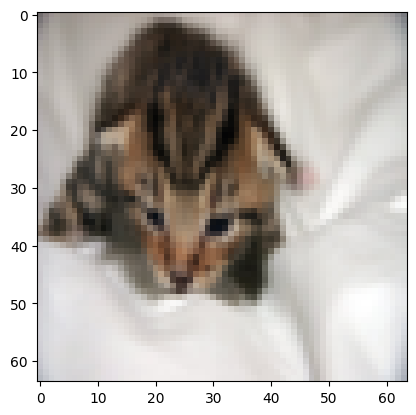

In [ ]:
index = 1
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

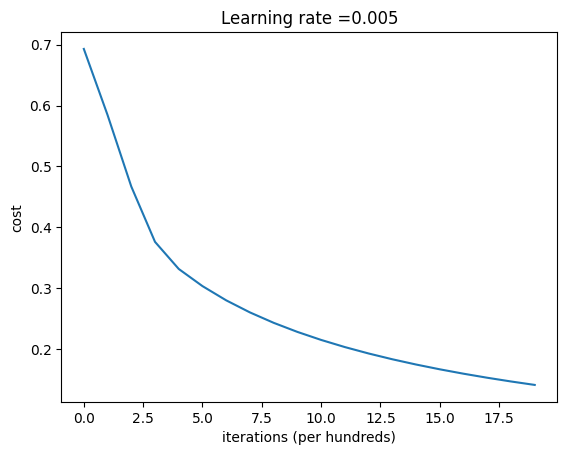

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



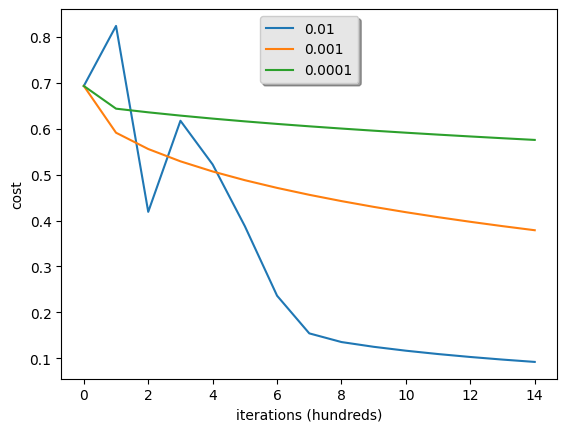

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [ ]:
# change this to the name of your image file
my_image = "my_image.jpg"

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")